<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 4*

# 📝 Assignment
---

# Interpreting ML Model

### 1) PDP를 만들어 모델을 설명하세요
- 한 특성에 대한 PDP를 만들고 모델을 설명하세요
- 두 특성간 관계에 대한 PDP를 만들고 모델을 설명하세요
- **(제출폼 과제)Boston 데이터의 train 데이터를 사용해 PDP plots을 그린 후, 집값에 대해 상대적으로 양의 선형관계를 나타내는 특성의 번호를 과제 제출폼에 제출하세요.**
    - 1. LSTAT
    - 2. CRIM
    - 3. NOX
    - 4. RM


In [106]:
!pip install category_encoders

In [107]:
### 이곳에서 과제를 진행해 주세요 ### 

import pandas as pd
from google.colab import drive
from xgboost import XGBClassifier

drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/credit.csv')


 # 주제 : 외국인 노동자 신용평가 모델 만들기

 # 외국인 노동자 데이터만 추출
data = data.drop(data[data['foreign_worker'] == 'no'].index,axis=0)

data.default.value_counts()
# 채무 저위험군 == 1 
# 채무 고위험군 == 2

target = data['default']
train = data.drop(['default'],axis=1)
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder

ordinal = OrdinalEncoder(cols=['checking_balance','savings_balance','employment_length'])
train = ordinal.fit_transform(train)

onehot = OneHotEncoder()
train = onehot.fit_transform(train)
col = train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(train)

from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(train, target, train_size=0.8, random_state=24)

train_X = pd.DataFrame(train_X,columns=col)
val_X = pd.DataFrame(val_X,columns=col)

model = XGBClassifier(
    n_estimators=800,  # 크지만, early stopping 에 따라 조절될 예쩡
           
  random_state=2
  , n_jobs=-1
  , max_depth=7  # default=3, high cardinality 특성을 위해 높게 지정
  , learning_rate=0.2
)

eval_set = [(train_X, train_y), (val_X,val_y)]

model.fit(train_X, train_y, 
          eval_set = eval_set, 
          eval_metric = 'error',
          early_stopping_rounds = 80) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0]	validation_0-error:0.171429	validation_1-error:0.233161
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 80 rounds.
[1]	validation_0-error:0.161039	validation_1-error:0.233161
[2]	validation_0-error:0.146753	validation_1-error:0.238342
[3]	validation_0-error:0.132468	validation_1-error:0.238342
[4]	validation_0-error:0.109091	validation_1-error:0.243523
[5]	validation_0-error:0.11039	validation_1-error:0.238342
[6]	validation_0-error:0.098701	validation_1-error:0.227979
[7]	validation_0-error:0.1	validation_1-error:0.217617
[8]	validation_0-error:0.088312	validation_1-error:0.227979
[9]	validation_0-error:0.087013	validation_1-error:0.222798
[10]	validation_0-error:0.077922	validation_1-error:0.227979
[11]	validation_0-error:0.066234	validation_1-error:0.2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [108]:
!pip install pdpbox

In [109]:
train_X

,checking_balance,months_loan_duration,credit_history_1,credit_history_2,credit_history_3,credit_history_4,credit_history_5,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,amount,savings_balance,employment_length,installment_rate,personal_status_1,personal_status_2,personal_status_3,personal_status_4,other_debtors_1,other_debtors_2,other_debtors_3,residence_history,property_1,property_2,property_3,property_4,age,installment_plan_1,installment_plan_2,installment_plan_3,housing_1,housing_2,housing_3,existing_credits,dependents,telephone_1,telephone_2,foreign_worker_1,job_1,job_2,job_3,job_4
0,0.815512,0.229640,1.565763,-1.061050,-0.317130,-0.202685,-0.229039,1.581714,-0.234018,-0.471255,-0.532917,-0.342300,-0.332756,-0.112331,-0.149308,-0.107492,-0.097129,-0.383640,2.402085,-1.124293,0.907283,0.913392,-0.677562,-0.231539,-0.313148,0.307113,-0.223972,-0.199892,1.033618,-0.611352,1.837736,-0.432924,-0.720366,1.440280,-2.078567,2.487281,-0.226517,0.637055,-0.355409,-0.463007,1.022629,-0.419314,-0.841099,0.841099,0.0,0.759016,-0.489267,-0.422732,-0.145633
1,1.901733,-1.262332,-0.638666,-1.061050,3.153281,-0.202685,-0.229039,1.581714,-0.234018,-0.471255,-0.532917,-0.342300,-0.332756,-0.112331,-0.149308,-0.107492,-0.097129,-0.932747,-0.250676,1.772548,-0.894188,-1.094820,1.475879,-0.231539,-0.313148,0.307113,-0.223972,-0.199892,-1.678574,-0.611352,1.837736,-0.432924,-0.720366,-0.574675,-2.078567,2.487281,-0.226517,0.637055,-0.355409,-0.463007,-0.705076,-0.419314,-0.841099,0.841099,0.0,0.759016,-0.489267,-0.422732,-0.145633
2,0.815512,-0.516346,1.565763,-1.061050,-0.317130,-0.202685,-0.229039,1.581714,-0.234018,-0.471255,-0.532917,-0.342300,-0.332756,-0.112331,-0.149308,-0.107492,-0.097129,-0.524126,-0.250676,-1.124293,0.907283,0.913392,-0.677562,-0.231539,-0.313148,0.307113,-0.223972,-0.199892,1.033618,-0.611352,-0.544148,-0.432924,1.388183,0.914640,0.481101,-0.402045,-0.226517,0.637055,-0.355409,-0.463007,1.022629,-0.419314,1.188921,-1.188921,0.0,0.759016,-0.489267,-0.422732,-0.145633
3,0.815512,0.229640,-0.638666,0.942462,-0.317130,-0.202685,-0.229039,1.581714,-0.234018,-0.471255,-0.532917,-0.342300,-0.332756,-0.112331,-0.149308,-0.107492,-0.097129,0.046732,0.633578,-1.124293,0.006547,0.913392,-0.677562,-0.231539,-0.313148,0.307113,-0.223972,-0.199892,-0.774510,-0.611352,-0.544148,-0.432924,1.388183,-0.399461,0.481101,-0.402045,-0.226517,0.637055,-0.355409,-0.463007,-0.705076,2.384848,1.188921,-1.188921,0.0,0.759016,-0.489267,-0.422732,-0.145633
4,0.815512,-1.013670,-0.638666,0.942462,-0.317130,-0.202685,-0.229039,1.581714,-0.234018,-0.471255,-0.532917,-0.342300,-0.332756,-0.112331,-0.149308,-0.107492,-0.097129,-0.194661,2.402085,-1.124293,0.006547,0.913392,-0.677562,-0.231539,-0.313148,-3.256134,-0.223972,5.002702,1.033618,-0.611352,-0.544148,-0.432924,1.388183,-0.049034,0.481101,-0.402045,-0.226517,0.637055,-0.355409,-0.463007,-0.705076,-0.419314,1.188921,-1.188921,0.0,0.759016,-0.489267,-0.422732,-0.145633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,-0.270709,-0.765008,-0.638666,0.942462,-0.317130,-0.202685,-0.229039,-0.632226,-0.234018,-0.471255,-0.532917,2.921413,-0.332756,-0.112331,-0.149308,-0.107492,-0.097129,-0.453170,-1.134930,-0.400083,0.907283,0.913392,-0.677562,-0.231539,-0.313148,0.307113,-0.223972,-0.199892,-0.774510,-0.611352,-0.544148,-0.432924,1.388183,-0.487068,0.481101,-0.402045,-0.226517,0.637055,-0.355409,-0.463007,-0.705076,-0.419314,-0.841099,0.841099,0.0,0.759016,-0.489267,-0.422732,-0.145633
766,1.901733,-0.765008,-0.638666,0.942462,-0.317130,-0.202685,-0.229039,1.581714,-0.234018,-0.471255,-0.532917,-0.342300,-0.332756,-0.112331,-0.149308,-0.107492,-0.097129,0.035679,-1.134930,-1.124293,-0.894188,0.913392,-0.677562,-0.231539,-0.313148,0.307113,-0.223972,-0.199892,0.129554,-0.611352,-0.544148,-0.43

In [110]:
# 한 특성과 타겟과의 PDP

# dpi 수치를 조정해서 이미지 화질 조정 

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'checking_balance'

(<Figure size 2160x1368 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bde8e390>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bdd5bf90>})

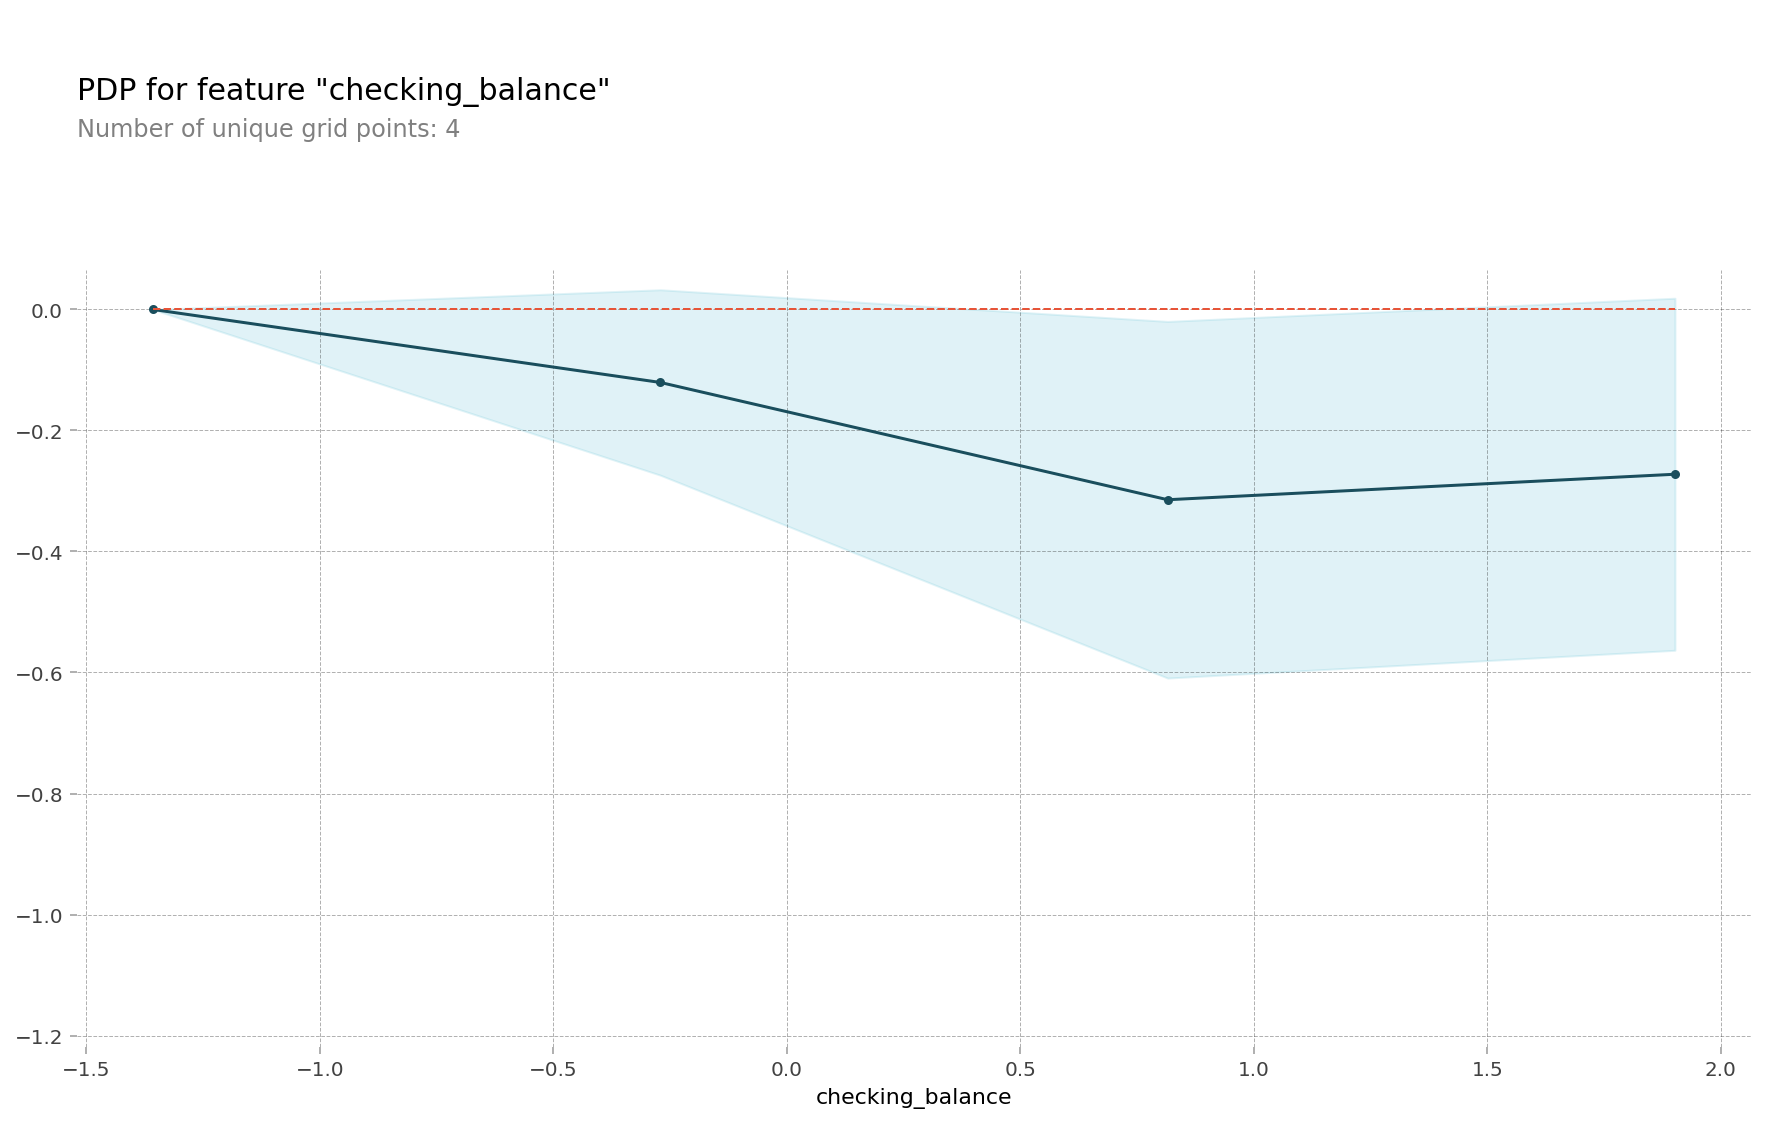

In [111]:
isolate = pdp_isolate(
    model = model,
    dataset = val_X,
    model_features =val_X.columns,
    feature=feature,
    grid_type = 'percentile',
    num_grid_points = 10 
)

pdp_plot(isolate, feature_name= feature)

In [112]:
# 당좌잔고가 0.5정도까지는 연체위험이 점점 감소하고 0.5 지점부터는 연체위험이 적은상태를 유지하는 것을 알 수 있다. 

(<Figure size 1080x1368 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bdc5c710>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bdf3de10>})

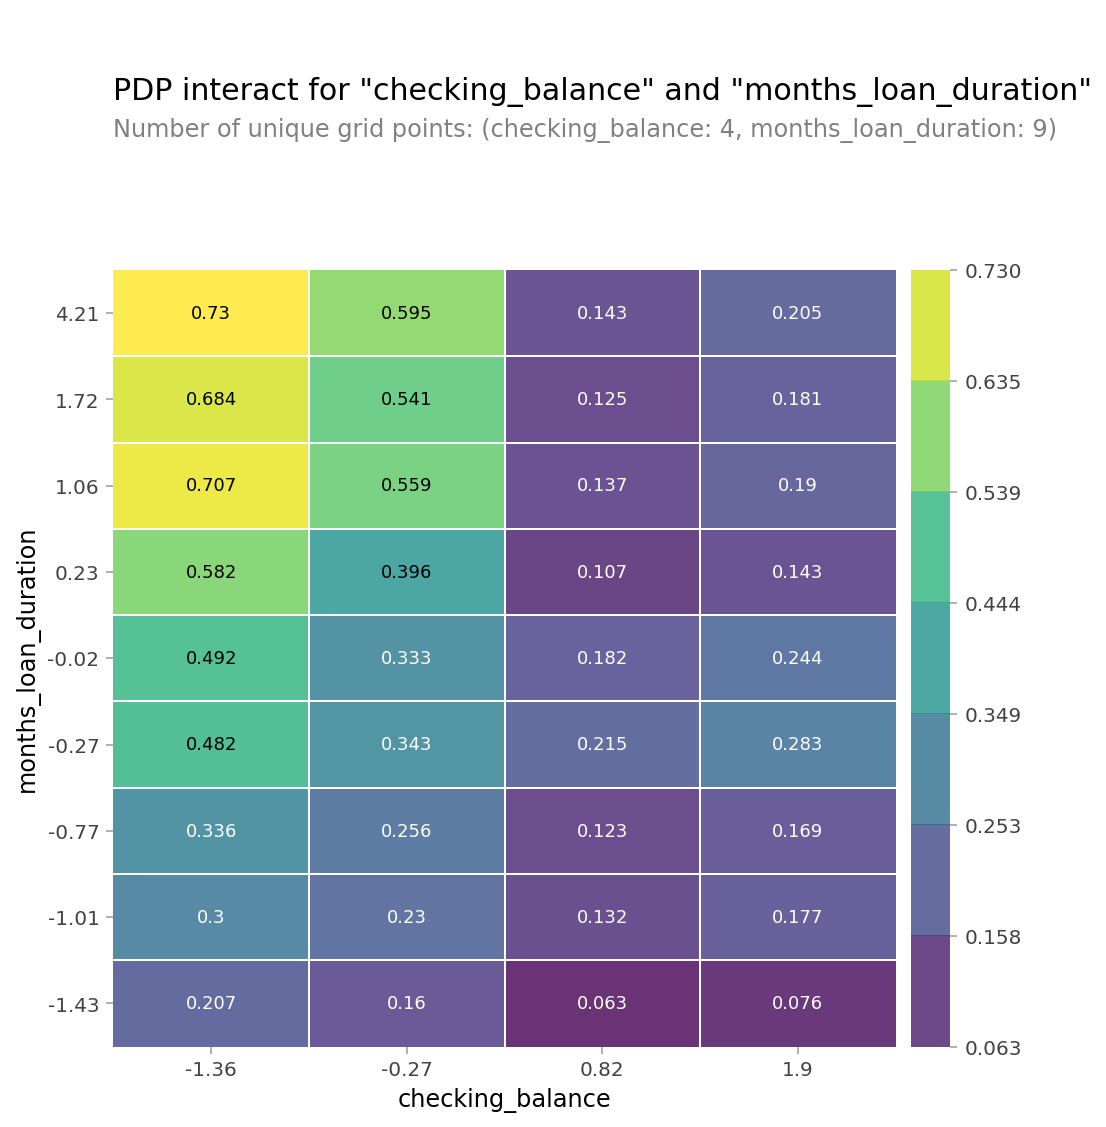

In [113]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
# 당좌잔고와 대출기간(월단위)
features = ['checking_balance','months_loan_duration']

interaction =  pdp_interact(
    model = model,
    dataset=val_X,
    model_features = val_X.columns,
    features = features
)
pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

In [114]:
# 당좌잔고가 작고, 대출 기간이 길면 연체 위험도가 늘어난다는 것을 알 수 있다. 
# 당좌잔고가 많고, 대출기간이 작으면  연체위험도가 줄어드는 것을 알 수 있다.

In [115]:
!pip install shap

In [116]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split

shap.initjs();

df, target = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(df, target, test_size=0.2, random_state=2)

model2 = xgboost.XGBRegressor().fit(X_train, y_train)

### Draw PDP plots ###

[11:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(<Figure size 2160x1368 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bdb6b4d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bdb8cf50>})

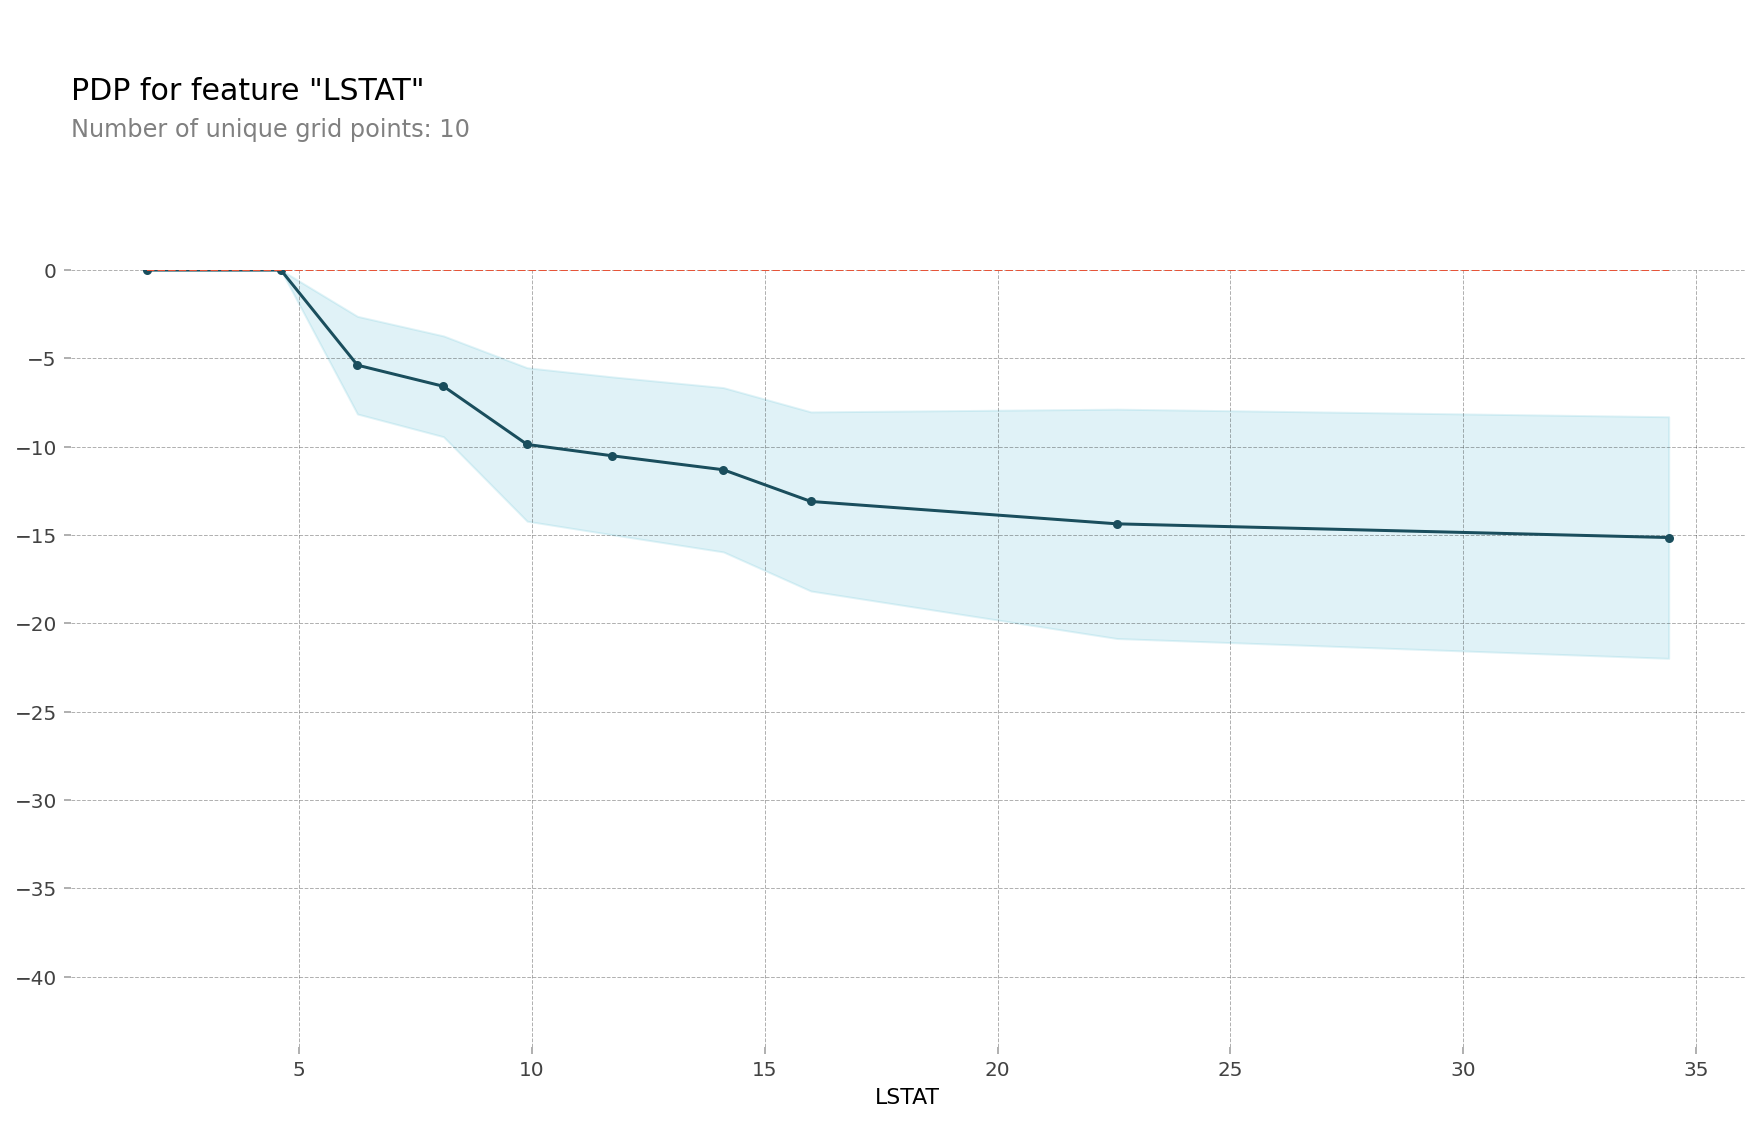

In [117]:
feature = 'LSTAT'

isolate = pdp_isolate(
    model = model2,
    dataset = X_test,
    model_features =X_test.columns,
    feature=feature,
    grid_type = 'percentile',
    num_grid_points = 10 
)

pdp_plot(isolate, feature_name= feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bda89ed0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bdb8ced0>})

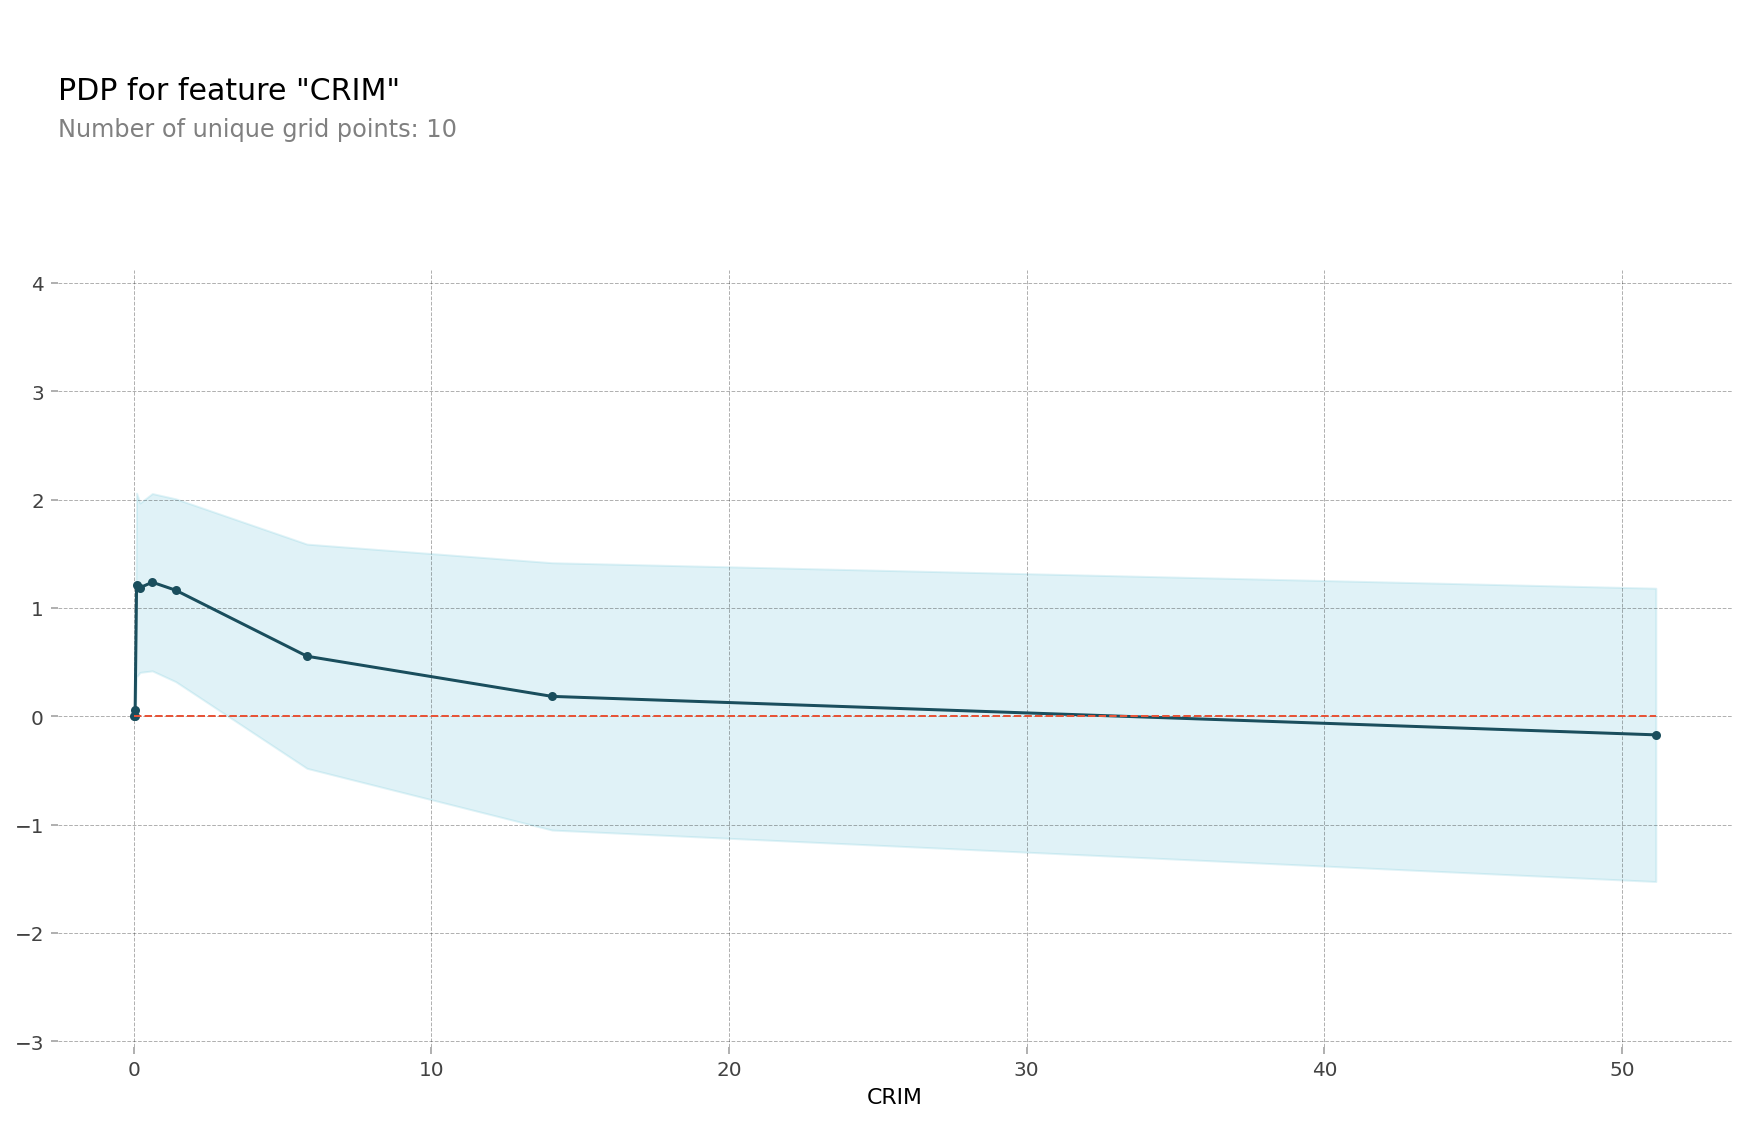

In [118]:
feature = 'CRIM'

isolate = pdp_isolate(
    model = model2,
    dataset = X_test,
    model_features =X_test.columns,
    feature=feature,
    grid_type = 'percentile',
    num_grid_points = 10 
)

pdp_plot(isolate, feature_name= feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bd9f4f90>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bd9e3d50>})

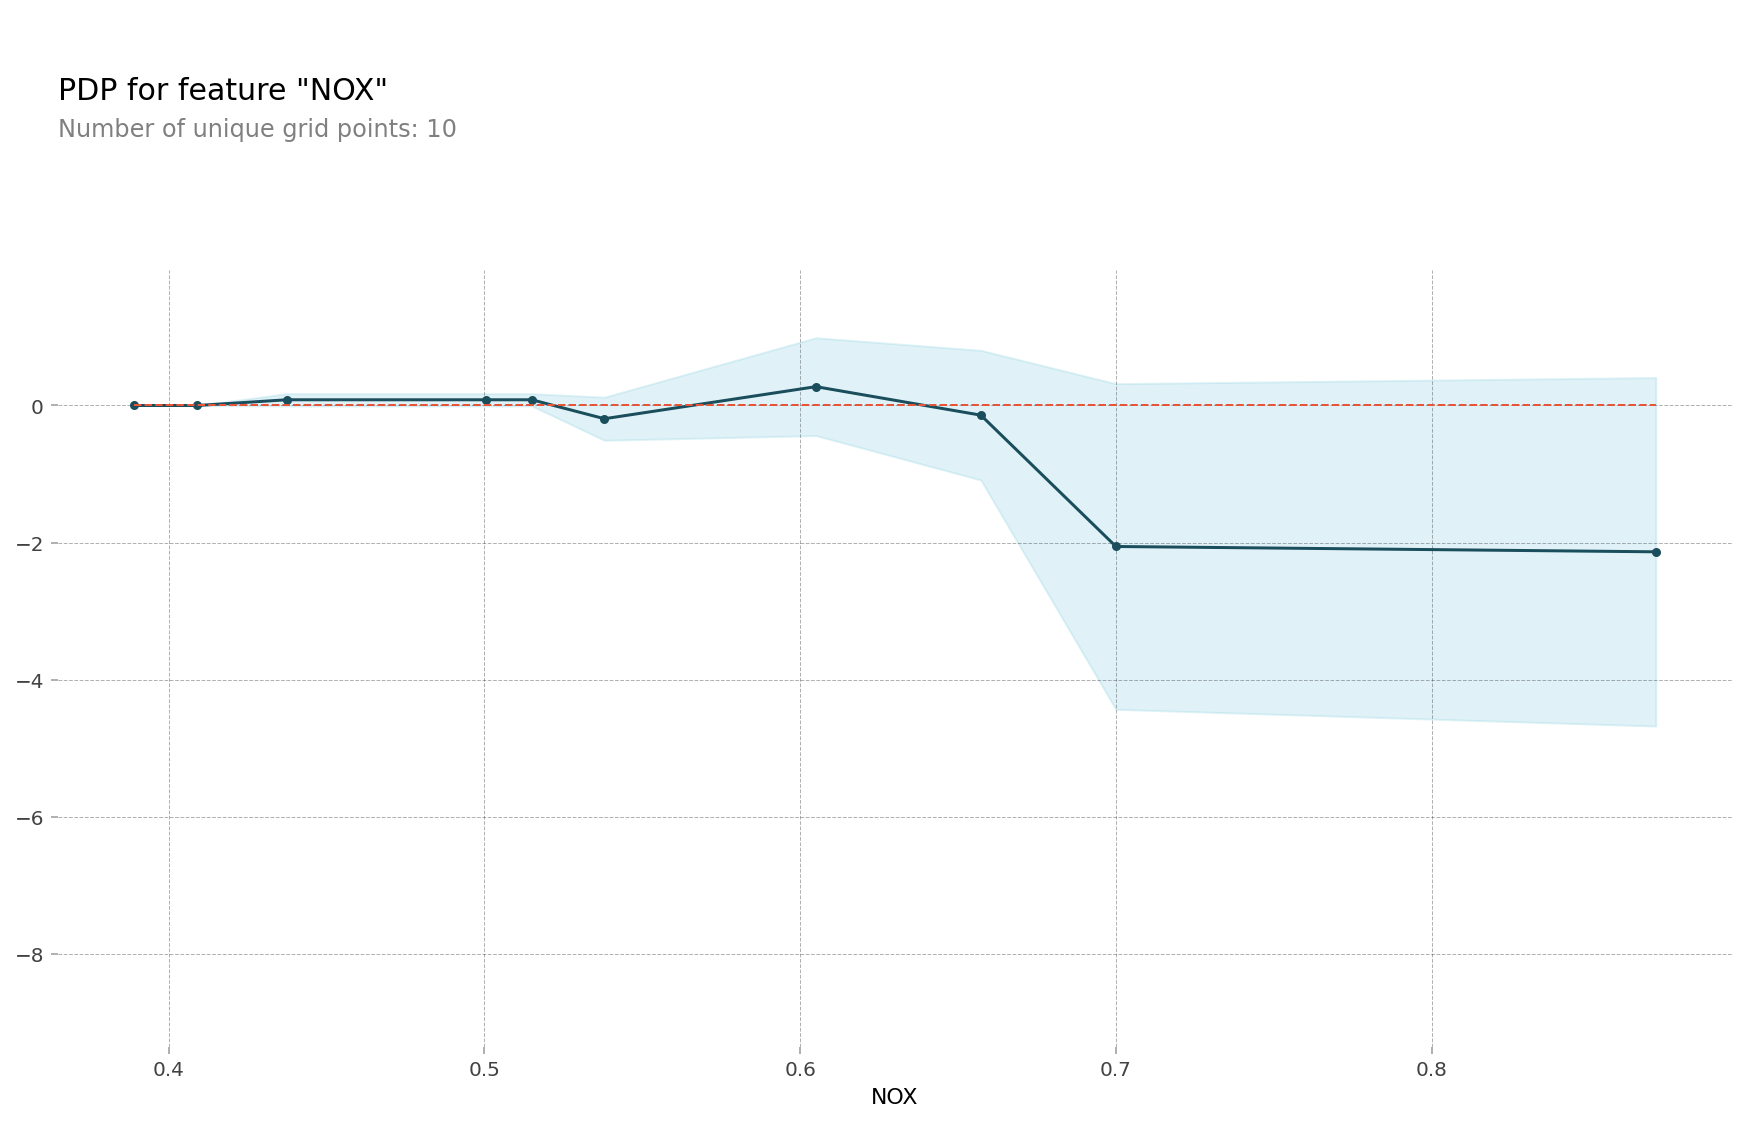

In [119]:
feature = 'NOX'

isolate = pdp_isolate(
    model = model2,
    dataset = X_test,
    model_features =X_test.columns,
    feature=feature,
    grid_type = 'percentile',
    num_grid_points = 10 
)

pdp_plot(isolate, feature_name= feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bd896250>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f91bd992350>})

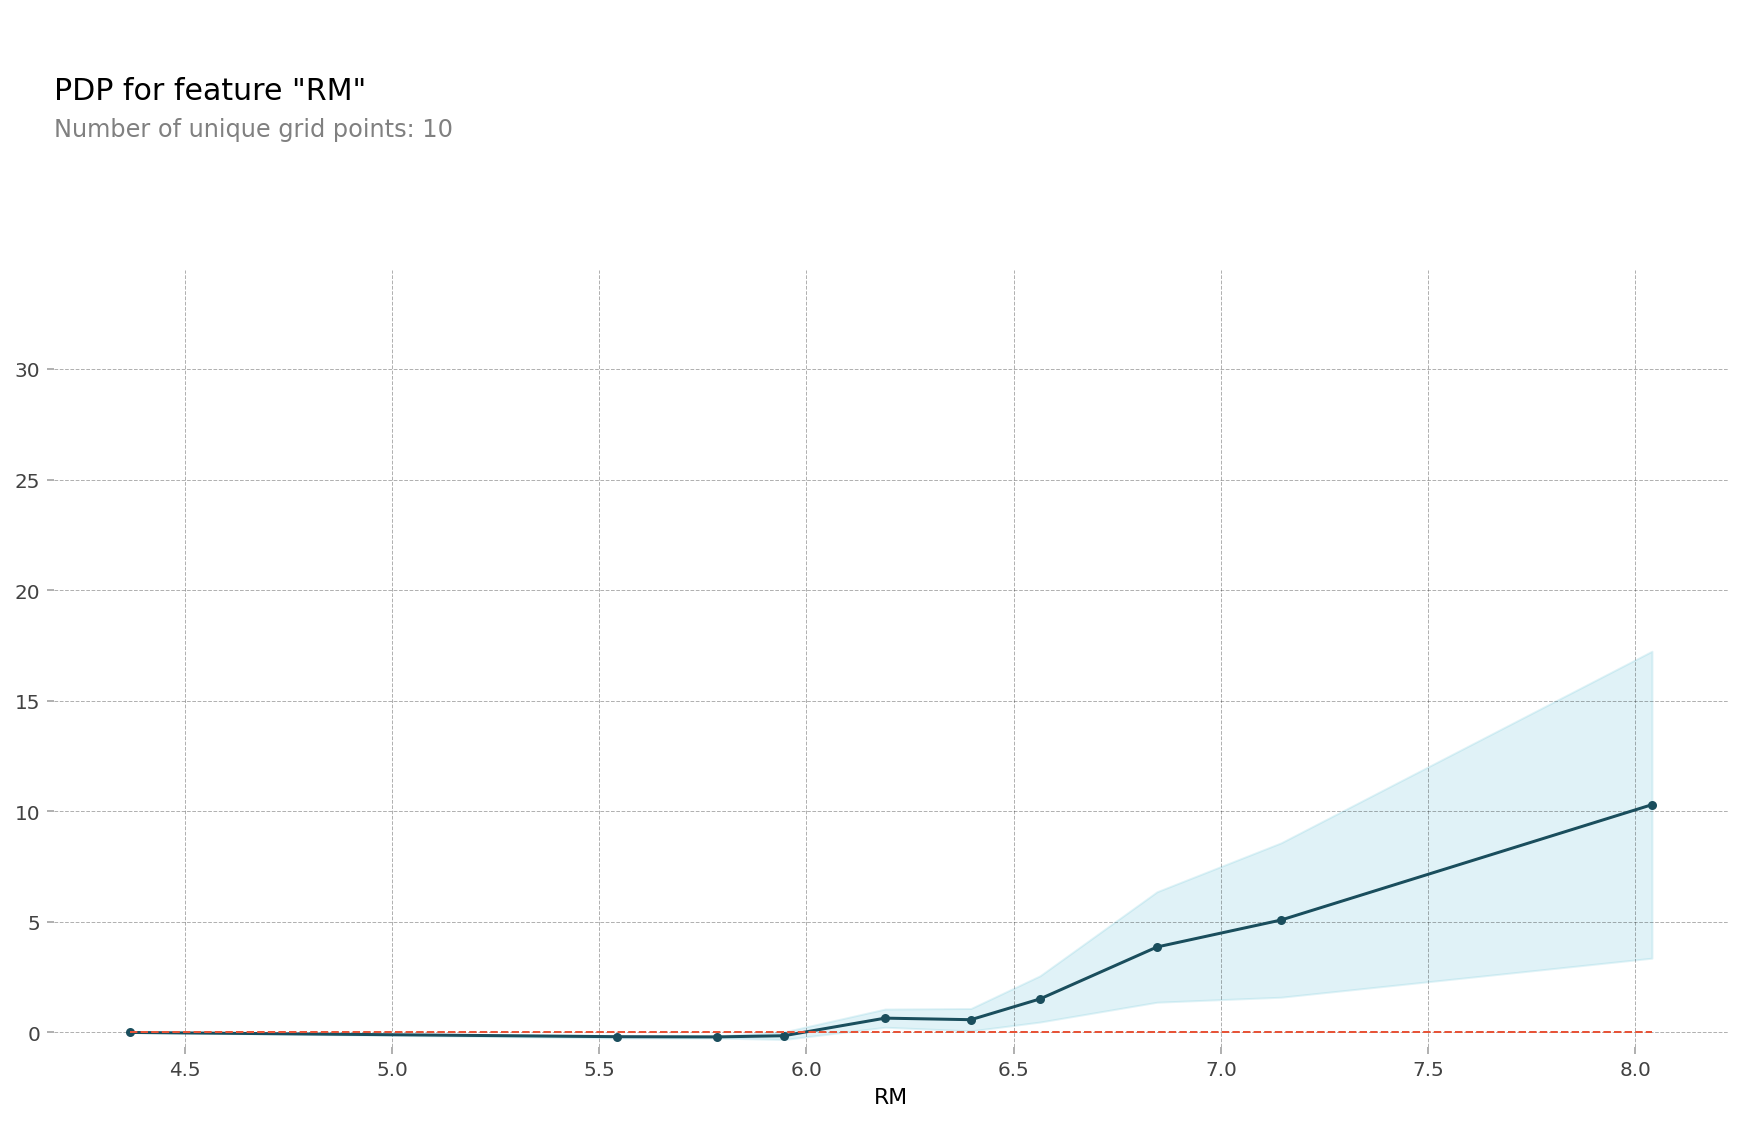

In [120]:
feature = 'RM'

isolate = pdp_isolate(
    model = model2,
    dataset = X_test,
    model_features =X_test.columns,
    feature=feature,
    grid_type = 'percentile',
    num_grid_points = 10
)

pdp_plot(isolate, feature_name= feature)

#4번이 양의 선형관계를 그린다

### 2) SHAP 라이브러리를 사용해 최소 3개 이상 시각화를 하고 분석하세요
- 본인 포트폴리오 데이터를 사용해서 SHAP 시각화를 수행하세요
- **(제출폼 과제) SHAP 라이브러리를 사용해 다음 문항 중 설명이 올바른 항목을 선택한 후 과제 제출폼에 제출하세요.**
    - 1. force_plot을 그려보면 CRIM은 항상 가격을 낮추는 영향을 준다.
    - 2. SHAP의 summary_plot을 사용하면 permutation importance를 구할 수 있다.
    - 3. SHAP summary_plot을 그려보면 (조건: X_train, plot_type='bar') LSTAT이 가장 영향력이 큰 특성으로 보인다.
    - 4. 모델의 feature importance(model.feature_importances_)를 구하면 가장 영향력이 큰 특성이 RM임을 알 수있다.**


In [121]:
row = val_X.iloc[[1]]
row

,checking_balance,months_loan_duration,credit_history_1,credit_history_2,credit_history_3,credit_history_4,credit_history_5,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,amount,savings_balance,employment_length,installment_rate,personal_status_1,personal_status_2,personal_status_3,personal_status_4,other_debtors_1,other_debtors_2,other_debtors_3,residence_history,property_1,property_2,property_3,property_4,age,installment_plan_1,installment_plan_2,installment_plan_3,housing_1,housing_2,housing_3,existing_credits,dependents,telephone_1,telephone_2,foreign_worker_1,job_1,job_2,job_3,job_4
1,-1.356931,-0.765008,1.565763,-1.06105,-0.31713,-0.202685,-0.229039,-0.632226,-0.234018,2.121994,-0.532917,-0.3423,-0.332756,-0.112331,-0.149308,-0.107492,-0.097129,-0.375439,-0.250676,-1.124293,0.006547,0.913392,-0.677562,-0.231539,-0.313148,0.307113,-0.223972,-0.199892,0.129554,-0.611352,1.837736,-0.432924,-0.720366,2.141134,0.481101,-0.402045,-0.226517,0.637055,-0.355409,-0.463007,1.022629,-0.419314,-0.841099,0.841099,0.0,0.759016,-0.489267,-0.422732,-0.145633


In [122]:
### 이곳에서 과제를 진행해 주세요 ###

row = val_X.iloc[[1]]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [123]:
row = X_test.iloc[[1]]

# 실제 타겟값
y_test[[1]]

array([15.3])

In [124]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###

### Draw SHAP plots ###

explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

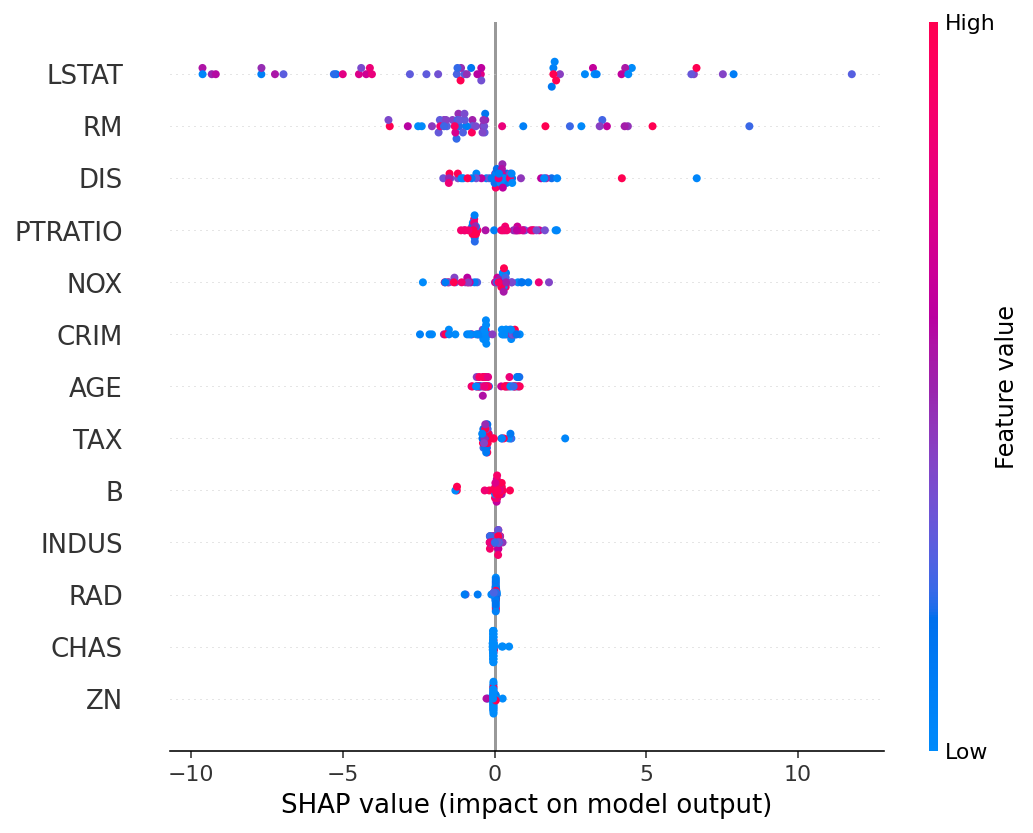

In [137]:
shap_values = explainer.shap_values(X_test.iloc[:50])
shap.summary_plot(shap_values, X_train.iloc[:50])

# 개별 관측치에 대한 설명

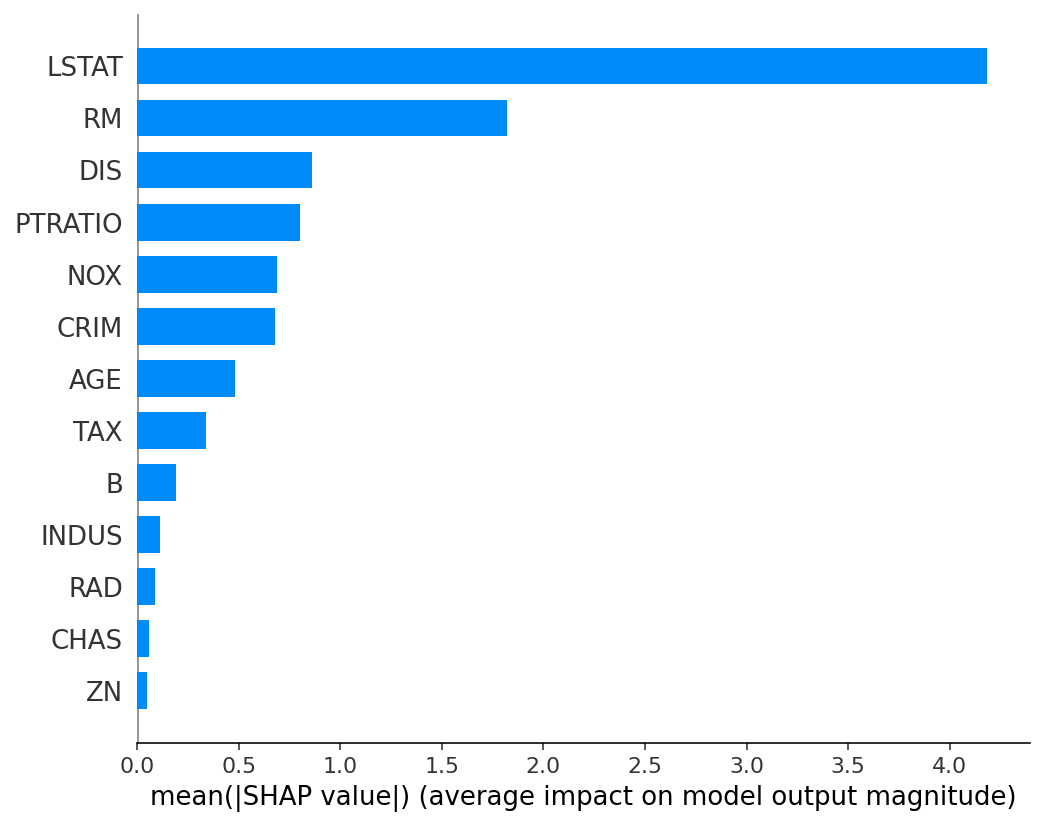

In [138]:
shap.summary_plot(shap_values, X_train.iloc[:300], plot_type="bar")

In [177]:
new = pd.DataFrame(model2.feature_importances_,X_test.columns)
new.sort_values(by=[0], axis=0,ascending=False)

# 가장 영향력이 큰 특성은 LSTAT

--- 객관식 답 3 번

,0
LSTAT,0.591114
RM,0.152121
DIS,0.044467
NOX,0.044341
PTRATIO,0.041819
CRIM,0.040354
TAX,0.025285
B,0.012665
RAD,0.012394
INDUS,0.011504


## 🔥 도전과제

### 3) 지속적으로 포트폴리오 프로젝트를 수행하세요
- 지속적으로 데이터를 랭글링 하고 추가적인 시각화 결과를 만드세요

In [125]:
### 이곳에서 과제를 진행해 주세요 ###